# <center>Извлечение признаков из временного ряда</center>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)

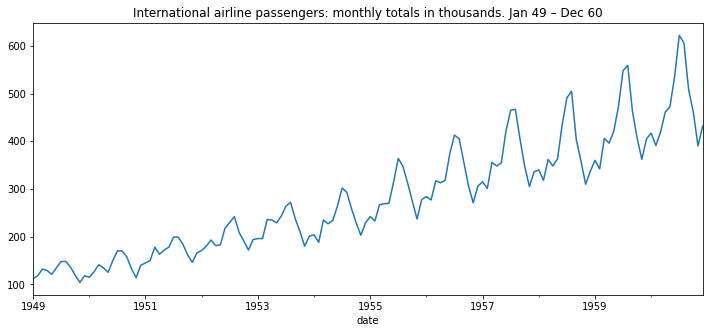

In [4]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

## <p><center>Задание 1</center></p>
<p>Для ряда пассажирских авиаперевозок постройте прогнозную модель вида (2).</p>
<p>Постройте прогноз на 3 года вперед и отобразите его на графике.</p>
<p>Найдите остатки полученной модели. Является ли ряд остатков стационарным? Для
проверки отобразите его на графике.</p>

In [68]:
from math import pi
from scipy.optimize import minimize

In [84]:
one = [1 for i in range(len(passengers))]
months = list(range(len(passengers)))
sinus = [np.sin(2*pi*(i-1)/12) for i in range(0, len(passengers))]
cosinus = [np.cos(2*pi*(i-1)/12) for i in range(0, len(passengers))]

In [85]:
data = {'one': one,
        'months': months,
        'sin': sinus,
        'cos': cosinus}
df = pd.DataFrame(data)
df.head()

,one,months,sin,cos
0,1,0,-0.500000,8.660254e-01
1,1,1,0.000000,1.000000e+00
2,1,2,0.500000,8.660254e-01
3,1,3,0.866025,5.000000e-01
4,1,4,1.000000,6.123234e-17


In [86]:
def MNK(teta, betta1, betta2, eps):
    y = np.dot(df, [eps, teta, betta1, betta2])
    return sum((y - passengers['num_passengers'])**2)/(2*len(passengers['num_passengers']))

In [91]:
res = minimize(lambda x: MNK(x[0], x[1], x[2], x[3]), (0.5, 0.5, 0.5, 0.5))
teta, betta1, betta2, eps = res.x
teta, betta1, betta2, eps

(2.6498777219864693, 27.44903395641085, -36.69059647978035, 90.83235695656246)

In [92]:
def predict(teta, betta1, betta2, eps):
    return np.dot(df, [eps, teta, betta1, betta2])

In [93]:
pred = predict(teta, betta1, betta2, eps)

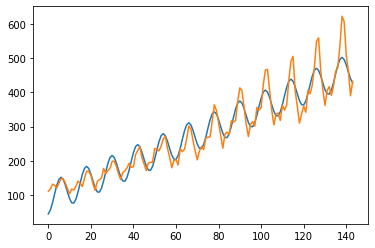

In [99]:
plt.plot(pred)
plt.plot(passengers["num_passengers"].values)
plt.show()

Построим прогноз на  3 года вперед

In [100]:
pred_one = [1 for i in range(len(passengers)+12*3)]
pred_months = list(range(len(passengers)+12*3))
pred_sinus = [np.sin(2*pi*(i-1)/12) for i in range(0, len(passengers)+12*3)]
pred_cosinus = [np.cos(2*pi*(i-1)/12) for i in range(0, len(passengers)+12*3)]

In [102]:
pred_data = {'one': pred_one,
        'months': pred_months,
        'sin': pred_sinus,
        'cos': pred_cosinus}

df = pd.DataFrame(pred_data)
df.head()

,one,months,sin,cos
0,1,0,-0.500000,8.660254e-01
1,1,1,0.000000,1.000000e+00
2,1,2,0.500000,8.660254e-01
3,1,3,0.866025,5.000000e-01
4,1,4,1.000000,6.123234e-17


In [103]:
pred3 = predict(teta, betta1, betta2, eps)

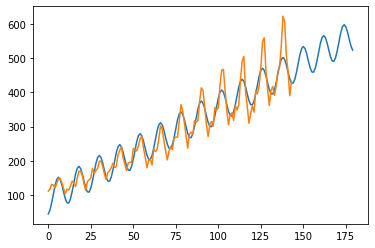

In [104]:
plt.plot(pred3)
plt.plot(passengers["num_passengers"].values)
plt.show()

Проверим стационарность остатков

In [105]:
one = [1 for i in range(len(passengers))]
months = list(range(len(passengers)))
sinus = [np.sin(2*pi*(i-1)/12) for i in range(0, len(passengers))]
cosinus = [np.cos(2*pi*(i-1)/12) for i in range(0, len(passengers))]

In [106]:
data = {'one': one,
        'months': months,
        'sin': sinus,
        'cos': cosinus}
df = pd.DataFrame(data)
df.head()

,one,months,sin,cos
0,1,0,-0.500000,8.660254e-01
1,1,1,0.000000,1.000000e+00
2,1,2,0.500000,8.660254e-01
3,1,3,0.866025,5.000000e-01
4,1,4,1.000000,6.123234e-17


In [107]:
pred = predict(teta, betta1, betta2, eps)

In [108]:
ost = passengers["num_passengers"] - pred

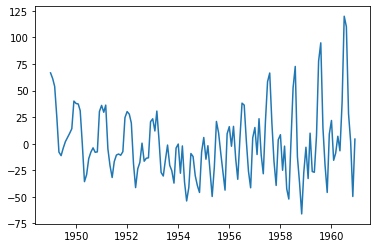

In [110]:
plt.plot(ost)
plt.show()

Ряд является стационарным, если он похож на случайный шум, не имеет тренда и сезонности. Если определять стационарный ряд или нет по графику, то он подходит под все критерии => является стационарным

## <center>Задание 2</center>
<p>Подумайте, как можно модифицировать модель на случай мультипликативной
сезонности.</p>
<p>Постройте соответствующую модель и получите прогноз на 3 года вперед.</p>
<p>Отобразите результат прогнозирования на графике. Как изменились остатки модели?</p>

<I>Мультипликативная сезонность означает, что амплтитутда сезонных колебаний меняется, следовательно, это необходимо учитывать при построении прогноза.</I>